<div class='alert alert-info alert-block' align='Center'><h1><b>Finding the Churn Rate for one of the telecom clients</b></h1></div>
<div align='Center'><h5><b>By using Naive Bayes Model</b></h5></div>

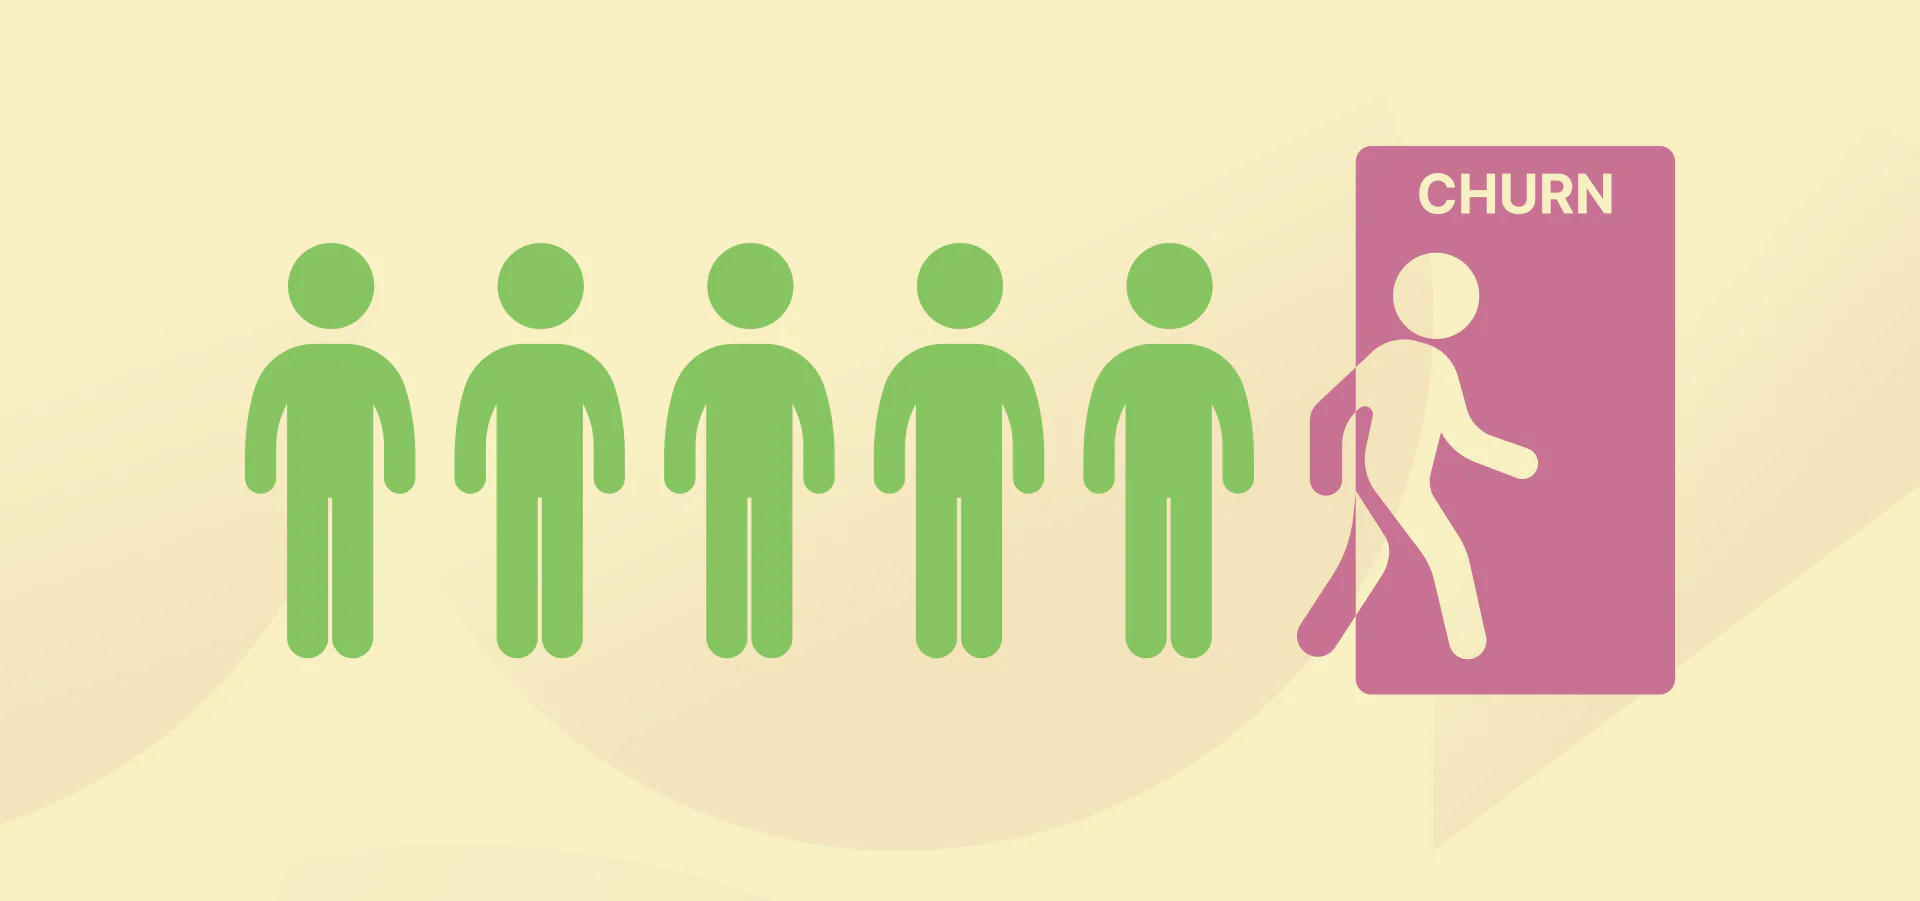

In [230]:
Image(r"C:\Users\shubh\Desktop\python\upgrad\Images\churn.png")


Any type of churn leads to a lot of loss for the company. Here, the task is to reduce the churn rate of the customers by seeing the details of the plans, services, and charges of the customers. At the end, you need a model that will predict the churn rate properly and gives a good prediction for this telecom company. 

## Project Tasks
- Pre-processing the data.
- Missing Value Treatment 
- Outlier Treatment if required 
- Feature Scaling 
- Encoding or any other technique to make categorial to Numerical data
- Do extensive exploratory data analysis before creating the model.
- Write the detailed conclusions from the analysis. 
- Identify the variables you think are the most important ones.
- Splitting the dataset into train and test sets (if required).
- Apply the algorithm which you have learnt, i.e., Naïve Bayes. 
- At the end, write the detailed analysis and the behavior you saw from the experiments. 
- Finding the best performing model using the accuracy score, confusion matrix, TPR, FPR, TNR, FNR, Precision, Recall, F1-Score, ROC Curve, and loss function. Explain the interpretation of the result.

## Data Dictionary of the dataset
- CustomerID - Unique Customer ID
- Gender - Gender of the customer
- SeniorCitizen - Whether a customer can be classified as a senior citizen
- Partner - If a customer is married/ in a live-in relationship
- Dependents - If a customer has dependents (children/retired parents)
- Tenure - The time for which a customer has been using the service
- PhoneService - Whether a customer has a landline phone service along with the internet service
- MultipleLines - Whether a customer has multiple lines of internet connectivity
- InternetService - The type of internet services chosen by the customer
- OnlineSecurity - Specifies if a customer has online security
- OnlineBackup - Specifies if a customer has online backup
- DeviceProtection - Specifies if a customer has opted for device protection
- TechSupport - Whether a customer has opted for tech support of not
- StreamingTV - Whether a customer has an option of TV streaming
- StreamingMovies - Whether a customer has an option of Movie streaming
- Contract - The type of contract a customer has chosen
- PaperlessBilling - Whether a customer has opted for paperless billing
- PaymentMethod - Specifies the method by which bills are paid
- MonthlyCharges - Specifies the money paid by a customer each month
- TotalCharges - The total money paid by the customer to the company
- Churn - This is the target variable that specifies if a customer has churned or not

In [224]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for modelling
from sklearn.model_selection import train_test_split  , GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report,roc_auc_score
from sklearn.metrics import log_loss ,RocCurveDisplay , recall_score , roc_curve
from sklearn.preprocessing import StandardScaler , LabelEncoder ,MinMaxScaler
from sklearn.naive_bayes import GaussianNB , MultinomialNB ,BernoulliNB

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset

df = pd.read_csv(r"case_Study_nb.csv")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [6]:
# rows and columns of the data
df.shape

(7043, 21)

In [8]:
# getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [10]:
# checking for null records in data
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

##### There are no null value in the data

In [13]:
# checking for the duplicates records

df.duplicated().sum()

0

**There are no duplicates results**

In [16]:
# dropping the customerID as will not contributes in analysis and prediction 

df = df.drop('customerID',axis=1)

<div class='alert alert-info alert-block' align='Center'><h3><b>Exploratory Data Analysis</b></h3></div>

In [20]:
# descriptive statistics information of data
df.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2277.717059,0.162147
std,24.559481,30.090047,2266.795349,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,395.225000,0.000000
50%,29.000000,70.350000,1391.150000,0.000000
75%,55.000000,89.850000,3780.625000,0.000000
max,72.000000,118.750000,8684.800000,1.000000


<Figure size 1000x300 with 0 Axes>

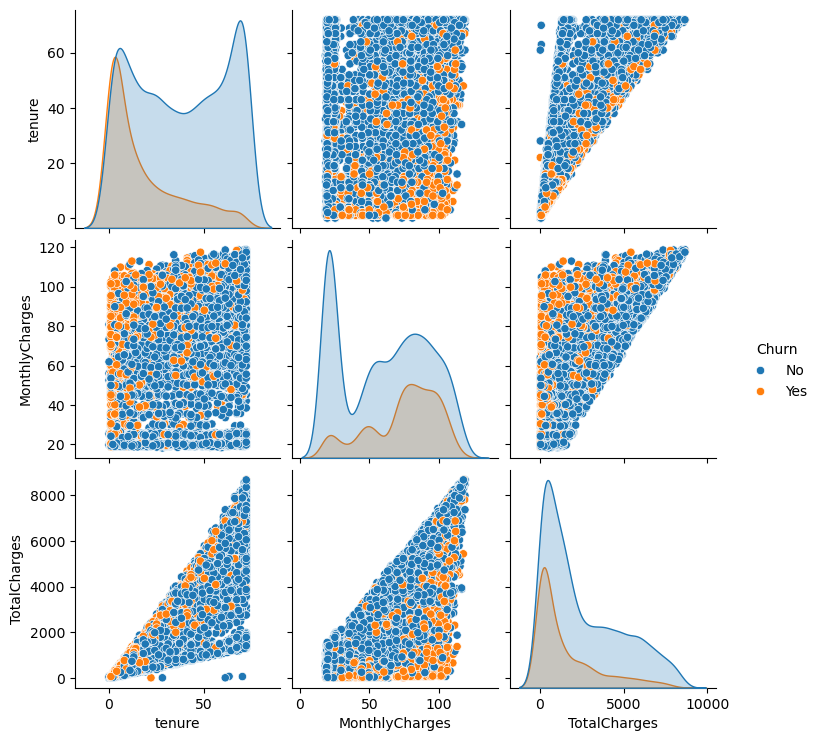

In [22]:
# plotting pairplot for tenure,MonthlyCharges,TotalCharges,Churn
plt.figure(figsize=(10,3))
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']], hue='Churn')
plt.show()

In [26]:
# getting uniques values for columns which have unique values less than 20
columns = df.columns

for i in columns:
    if df[i].nunique() <=20:
        print(f"Column : {i}\nUnique Records:{df[i].nunique()}")
        print(df[i].unique())
        print("\n***********************")

Column : PhoneService
Unique Records:2
['No' 'Yes']

***********************
Column : Contract
Unique Records:3
['Month-to-month' 'One year' 'Two year']

***********************
Column : PaperlessBilling
Unique Records:2
['Yes' 'No']

***********************
Column : PaymentMethod
Unique Records:4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

***********************
Column : gender
Unique Records:2
['Female' 'Male']

***********************
Column : SeniorCitizen
Unique Records:2
[0 1]

***********************
Column : Partner
Unique Records:2
['Yes' 'No']

***********************
Column : Dependents
Unique Records:2
['No' 'Yes']

***********************
Column : MultipleLines
Unique Records:3
['No phone service' 'No' 'Yes']

***********************
Column : InternetService
Unique Records:3
['DSL' 'Fiber optic' 'No']

***********************
Column : OnlineSecurity
Unique Records:3
['No' 'Yes' 'No internet service']

***********************

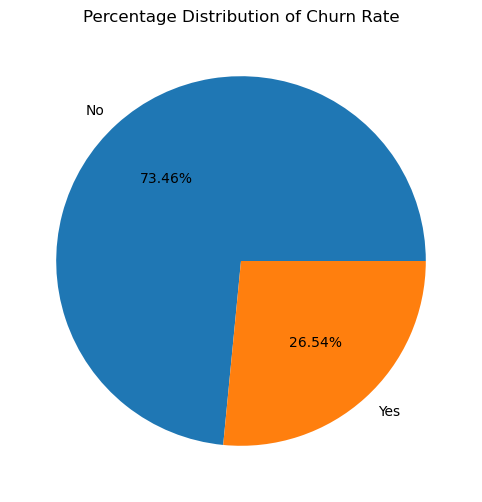

In [28]:
# plotting the pie chart for Churn rate
value_count = df['Churn'].value_counts()

plt.figure(figsize=(12,6))

plt.pie(value_count.values,autopct="%0.2f%%",labels=value_count.keys())

plt.title("Percentage Distribution of Churn Rate")
plt.show()

**The churn rate for the given telecom company, as observed in the chart, is 26.54%, indicating that approximately one in four customers is leaving the service. This highlights the importance of addressing customer retention strategies.**

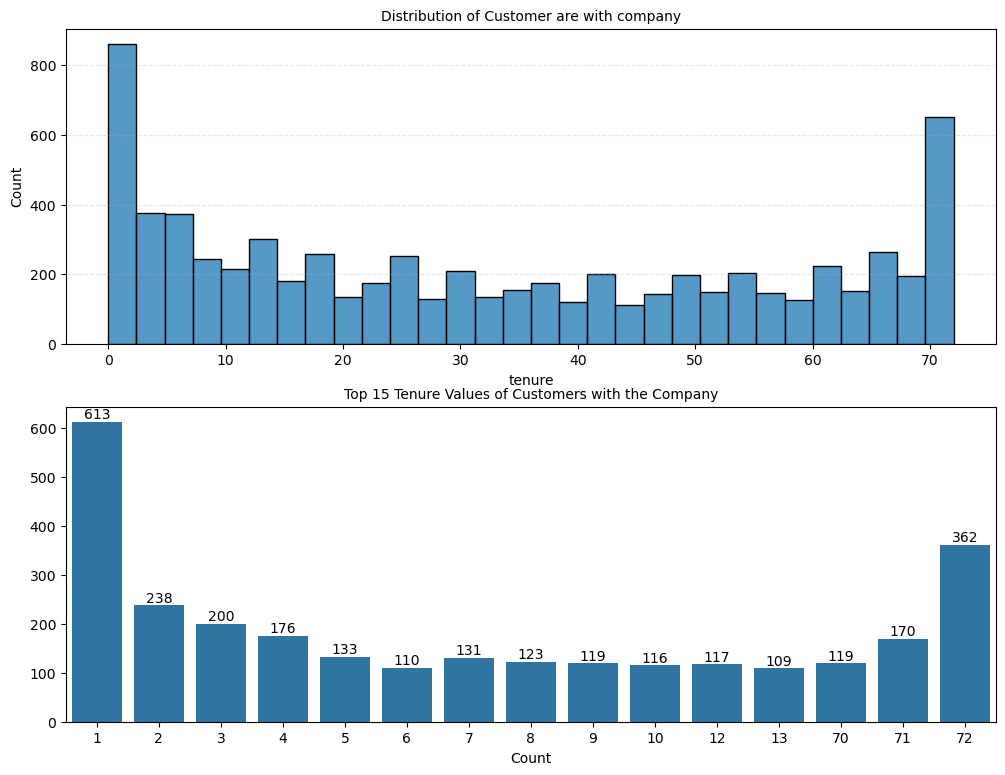

In [72]:
# creating visuals for tenure feature
plt.figure(figsize=(12,9))

plt.subplot(2,1,1)
sns.histplot(df['tenure'],bins=30)
plt.title("Distribution of Customer are with company",fontsize=10,zorder=4)
plt.grid(axis='y' , linestyle='--',alpha=0.3,zorder=0)

plt.subplot(2,1,2)
value_count = df['tenure'].value_counts().sort_values(ascending=False)[:15]
ax = sns.barplot(x=value_count.keys() , y=value_count.values)
for p in ax.patches:
    plt.text(
        p.get_x()+p.get_width()/2,
        p.get_height(),
        f'{p.get_height():.0f}',
        ha='center',
        va='bottom'
    )
plt.title("Top 15 Tenure Values of Customers with the Company",fontsize=10)
plt.xlabel('Count')
plt.show()

**The distribution of tenure values indicates that the majority of customers have a short tenure, with a significant peak at 1 month (613 occurrences). There is also a noticeable concentration at the maximum tenure of 72 months (362 occurrences), suggesting a group of long-term loyal customers. The distribution gradually decreases for other tenure values, reflecting a relatively low customer retention in intermediate durations.**

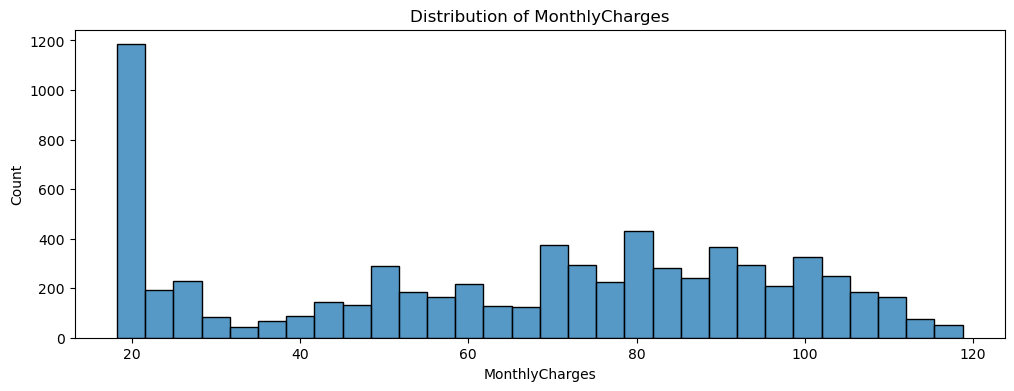

In [76]:
# Creating the visual for Monthly Charges
plt.figure(figsize=(12,4))

sns.histplot(df['MonthlyCharges'],bins=30)

plt.title("Distribution of MonthlyCharges")
plt.show()

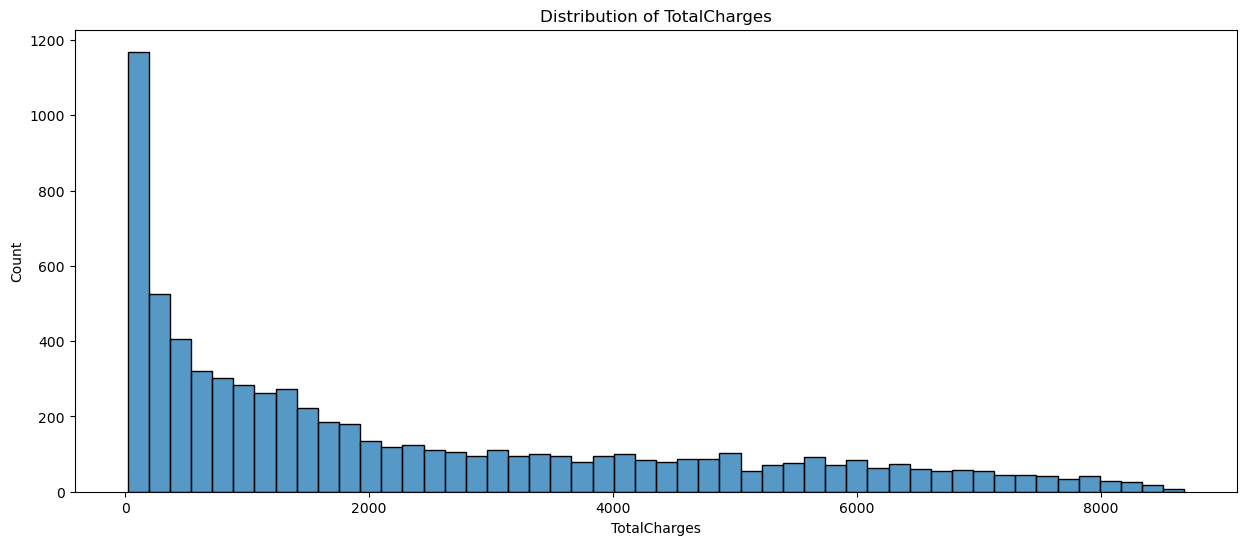

In [86]:
# creating the visual for totalCharges
plt.figure(figsize=(15,6))

sns.histplot(df['TotalCharges'],bins=50)

plt.title("Distribution of TotalCharges")
plt.show()

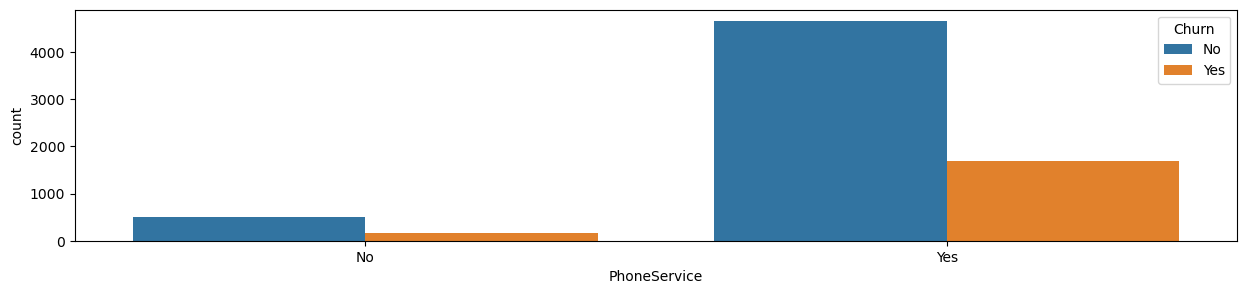

In [88]:
# creating the visual for Phone Service
plt.figure(figsize=(15,3))
sns.countplot(data=df, x = 'PhoneService',hue='Churn')
plt.show()


**Churn Rate is high for those customer who uses Phone Services**


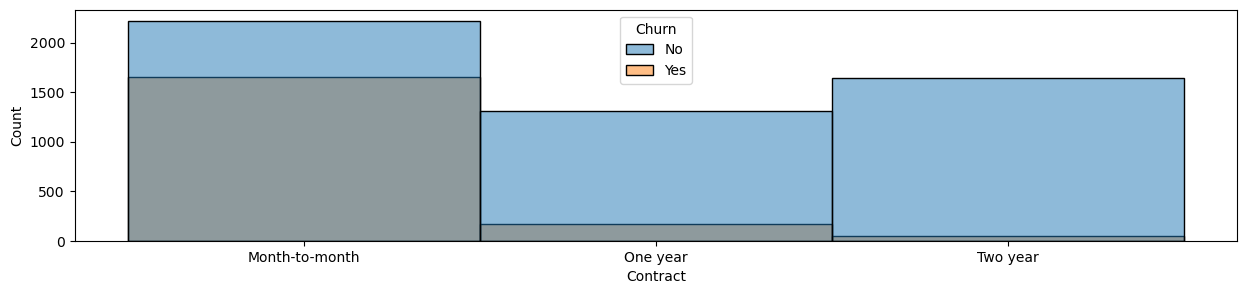

In [91]:
# creating the visual for Contract feature
plt.figure(figsize=(15,3))

sns.histplot(data=df , x = 'Contract',hue='Churn')
plt.show()

**Churn Rate is high for those customer who uses Month-to-Month Contract**

**Introducing more long-term plans could help reduce churn**

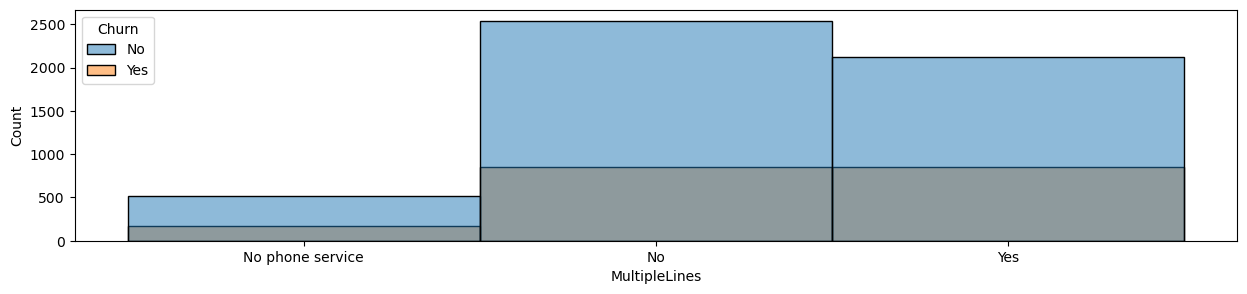

In [94]:
# creating the visual for MultipleLines feature
plt.figure(figsize=(15,3))

sns.histplot(data=df , x = 'MultipleLines',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that Multiple lines is an important variable for predicting the churn rate**

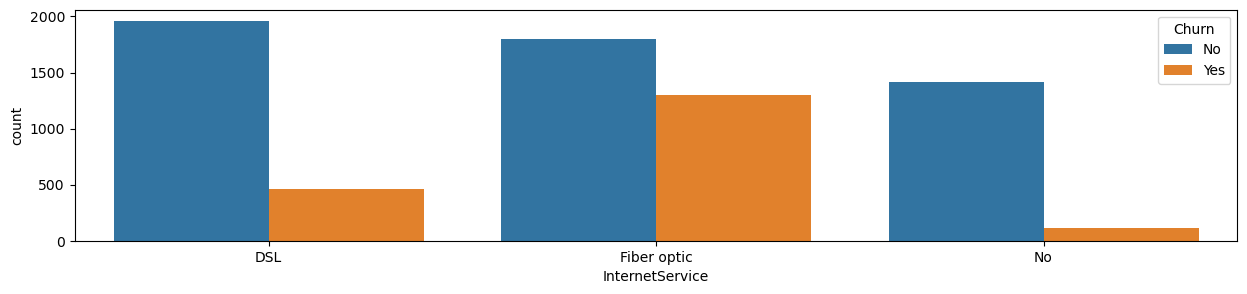

In [97]:
# creating the visual for Internet Service feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'InternetService',hue='Churn')
plt.show()

**From above Chart => Customers with Fiber Optic connections are more prone to Churn**

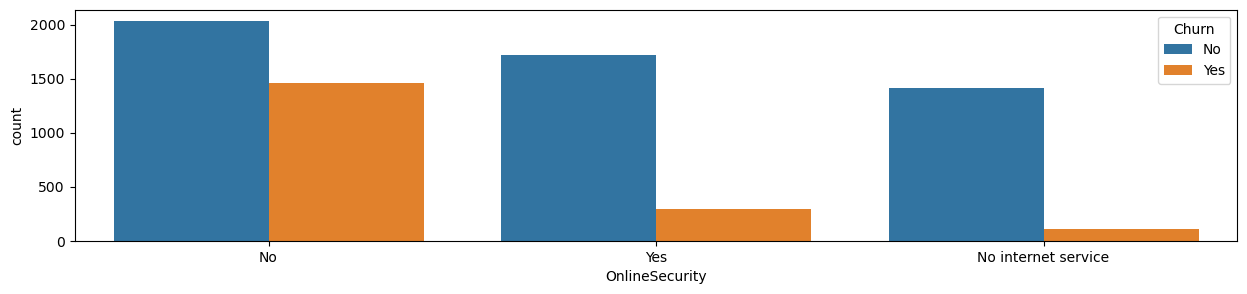

In [100]:
# creating the visual for Online Security feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'OnlineSecurity',hue='Churn')
plt.show()

**From the above chart => Customer with No Online security are more prone to Churn**

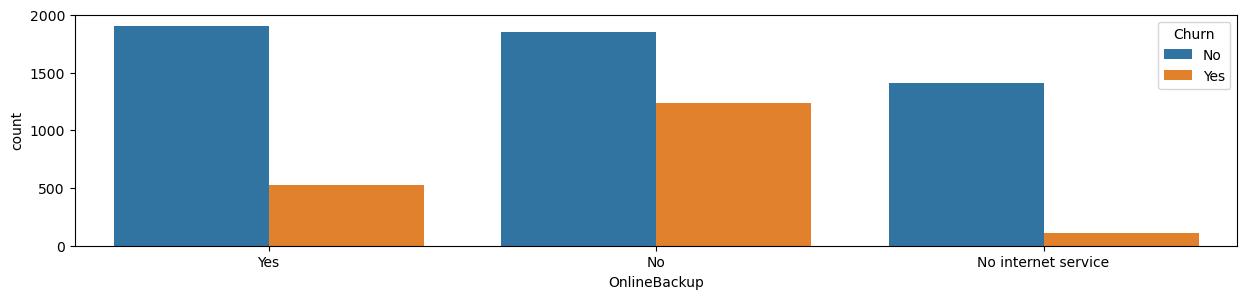

In [103]:
# creating the visual for Online Backup feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'OnlineBackup',hue='Churn')
plt.show()

**From the above chart => Customer with No Online backup are more prone to Churn**

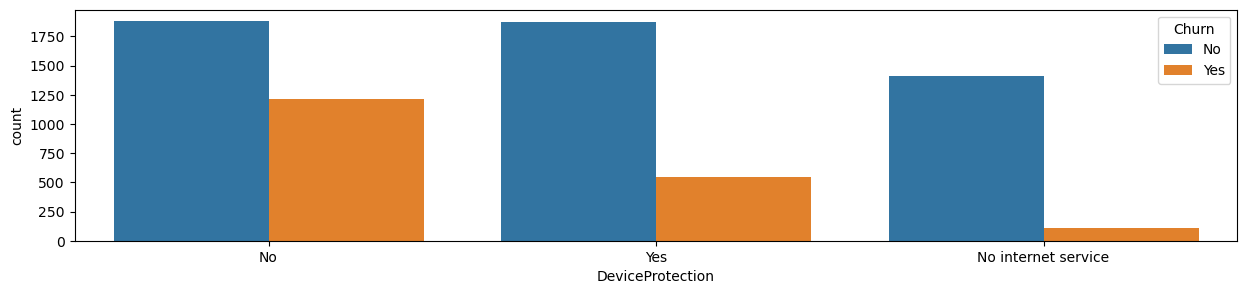

In [106]:
# creating the visual for Device Protection feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'DeviceProtection',hue='Churn')
plt.show()

**From the above chart => Customer with No Device Protection are more prone to Churn**

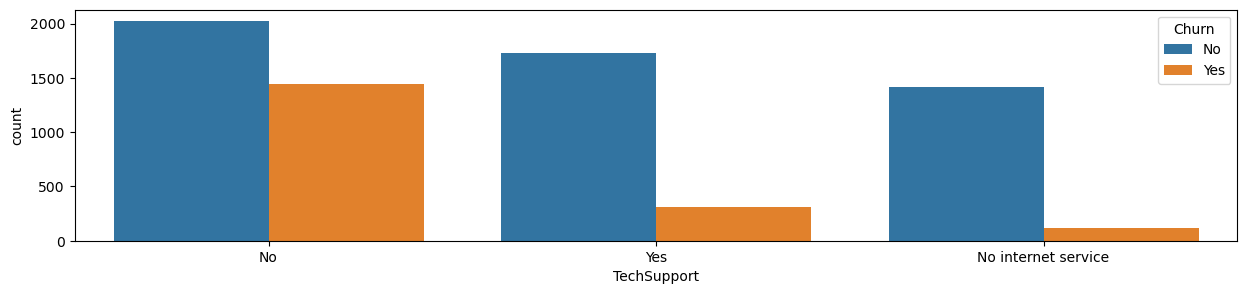

In [109]:
# creating the visual for Tech Support feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'TechSupport',hue='Churn')
plt.show()

**From the above chart => Customer with No Tech Support are more prone to Churn**

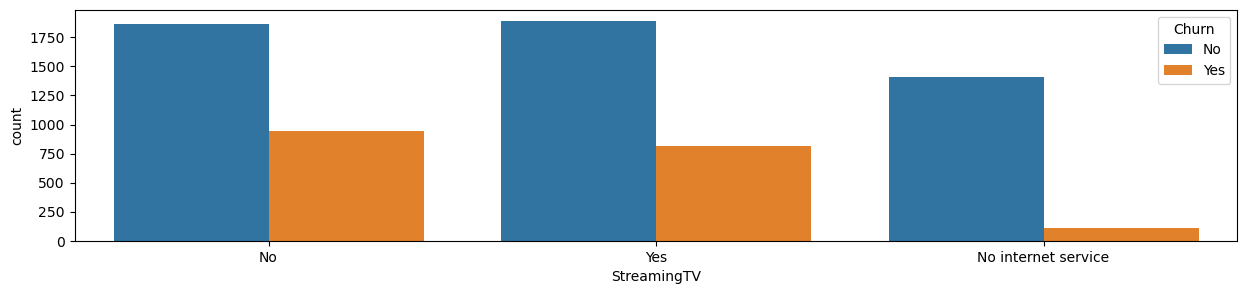

In [112]:
# creating the visual for Streaming TV feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'StreamingTV',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that Streaming TV is an important variable for predicting the churn rate**

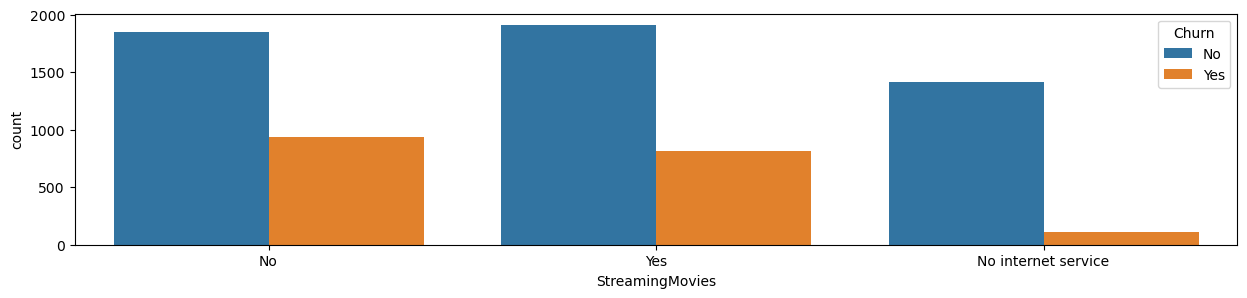

In [115]:
# creating the visual for Streaming Movies feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'StreamingMovies',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that Streaming Movies is an important variable for predicting the churn rate**

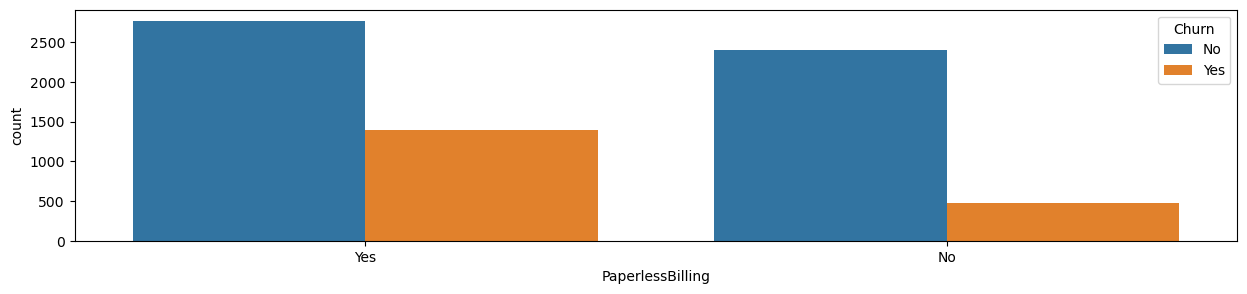

In [118]:
# creating the visual for Paperless Billing feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'PaperlessBilling',hue='Churn')
plt.show()

**From the above chart we can say that the customers with paperless billing are more prone to churn but as per my understanding that cannot be very significant variable for business point of view**

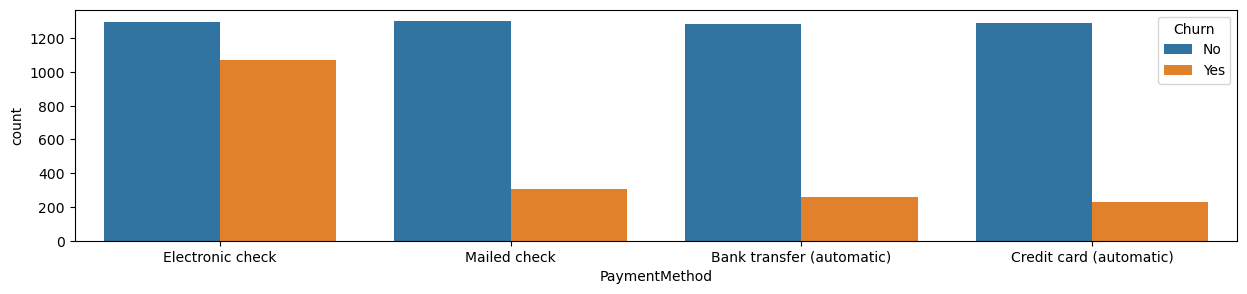

In [121]:
# creating the visual for Payment Method feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'PaymentMethod',hue='Churn')
plt.show()

**The churn rate is high among customers who pay through electronic checks.**

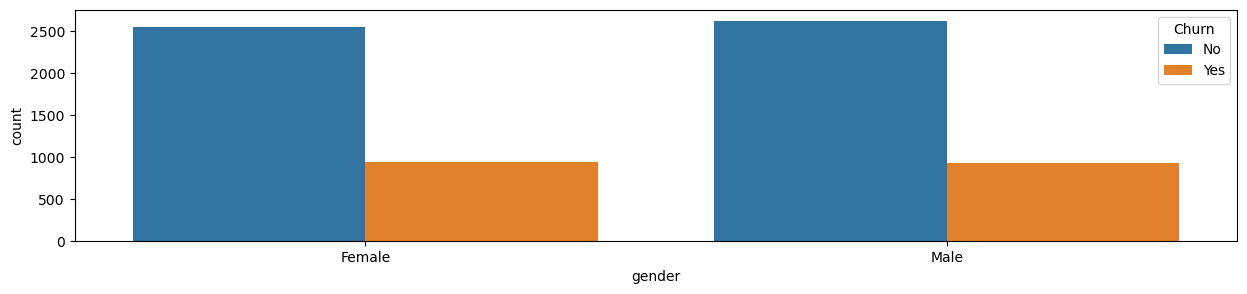

In [124]:
# creating the visual for gender feature
plt.figure(figsize=(15,3))

sns.countplot(data=df , x = 'gender',hue='Churn')
plt.show()

**There is no significant effect of gender feature on Churn Rate**

<div class='alert alert-info alert-block' align='center'><h3>Scaling and Encoding</h3></div>

In [155]:
# making object for encoding and scaling
encoder = LabelEncoder()
scaler = MinMaxScaler()
columns = df.columns

# separating the numerical and categorical columns
def segragation_columns(dataset):
    numerical_col = []
    categorical_col = []
    
    for col in columns:
        if dataset[col].dtype  in ['float','int64']:
            numerical_col.append(col)
        else:
            categorical_col.append(col)
    return numerical_col,categorical_col

numerical_col,categorical_col = segragation_columns(df)

# getting binary columns have 0 , 1 in it
def binary_columns(dataset):
    binary_col = []
    for col in dataset.select_dtypes(include=['int','float']).columns:
        unique_values = dataset[col].unique()
        if np.in1d(unique_values,[0,1]).all():
            binary_col.append(col)
    return binary_col

binary_col = binary_columns(df)

# removing binary columns from numerical columns as they dont need to scaled
numerical_col = [i for i in numerical_col if i not in binary_col]

# Encoding the categorical columns
def encoding(dataset , categorical_col):
    for col in categorical_col:
        dataset[col] = encoder.fit_transform(dataset[col])
    return dataset

df = encoding(df , categorical_col)

# Feature scaling the numerical columns
def feature_scaling(dataset , numerical_col):
    df[numerical_col] = scaler.fit_transform(df[numerical_col])
    return dataset

df = feature_scaling(df , numerical_col)

In [157]:
# top 5 rows of the data after scaling and encoding
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0.013889,0,0,1,2,0.115423,0.001275,0,0,1,0,1,0,0,2,0,0,0,0,0
1,0.472222,1,1,0,3,0.385075,0.215867,1,0,0,0,0,0,2,0,2,0,0,0,0
2,0.027778,1,0,1,3,0.354229,0.010310,1,0,0,0,0,0,2,2,0,0,0,0,1
3,0.625000,0,1,0,0,0.239303,0.210241,1,0,0,0,1,0,2,0,2,2,0,0,0
4,0.027778,1,0,1,2,0.521891,0.015330,0,0,0,0,0,1,0,0,0,0,0,0,1


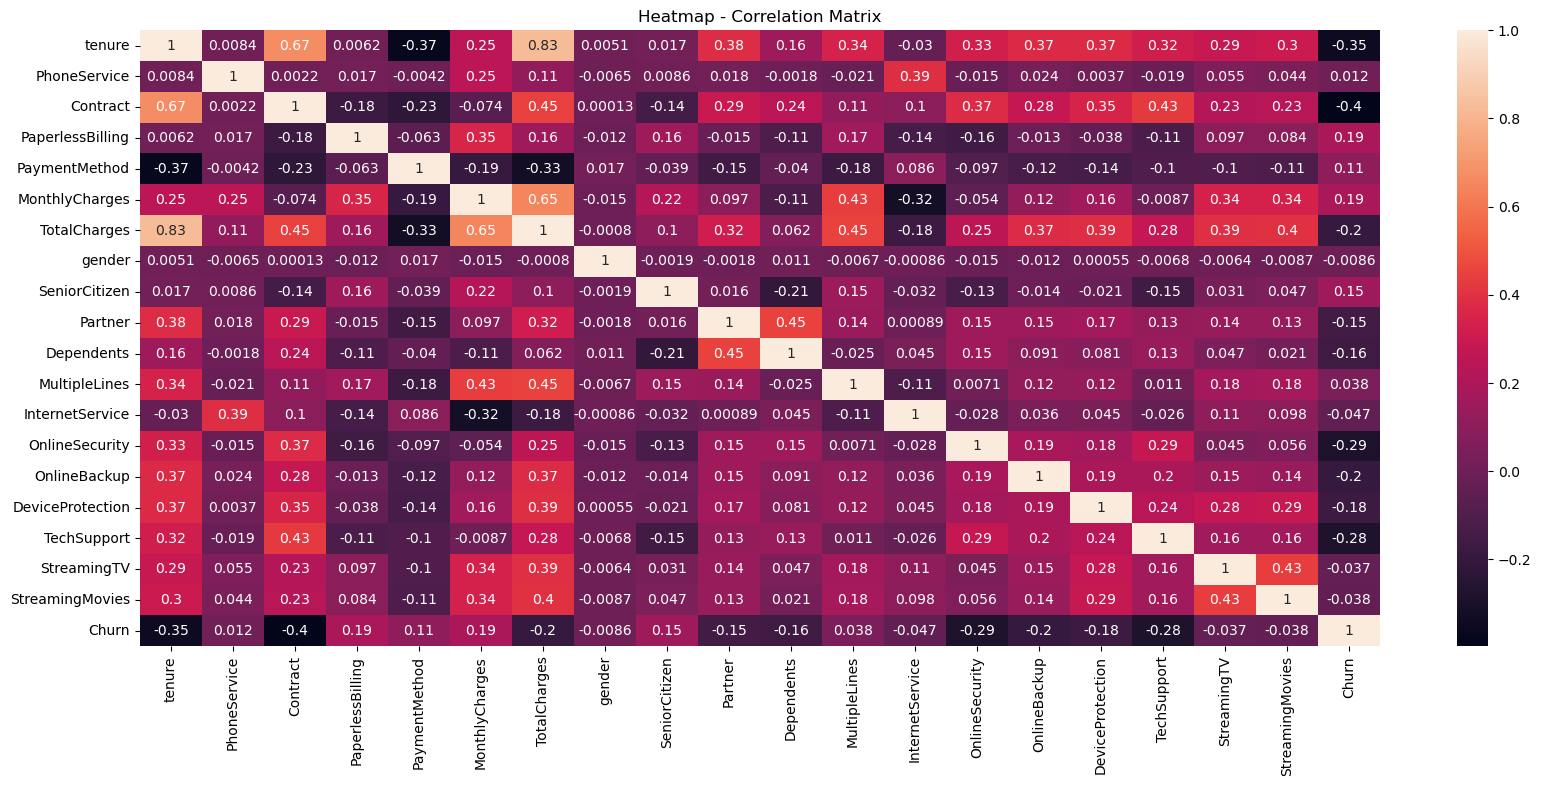

In [159]:
# plotting heatmap for correlation matrix
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.title('Heatmap - Correlation Matrix')
plt.show()

### Splitting the data for train and test

In [162]:
# features columns
X = df.drop('Churn',axis=1)

# target column
y = df['Churn']

In [164]:
# splitting the data for train and test

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2  , random_state=34)
print('Shape of features train data : ',X_train.shape)
print('Shape of target train data : ',y_train.shape)
print('Shape of feature test data : ',X_test.shape)
print('Shape of target test data : ',y_test.shape)

Shape of features train data :  (5634, 19)
Shape of target train data :  (5634,)
Shape of feature test data :  (1409, 19)
Shape of target test data :  (1409,)


#### Gaussian Naive Bayes model

In [175]:
gnb = GaussianNB()

# training the model 
model = gnb.fit(X_train , y_train)

# testing the model on train data
y_pred_train = model.predict(X_train)
print('Accuracy for train data:',accuracy_score(y_train , y_pred_train))

# testing the model on test data

y_pred_test = model.predict(X_test)
print('Accuracy for test data:',accuracy_score(y_test , y_pred_test))

Accuracy for train data: 0.7561235356762513
Accuracy for test data: 0.7501774308019872


#### Bernoulli Naive Bayes Model

In [177]:
bnb = BernoulliNB()

# training the model 
model = bnb.fit(X_train , y_train)

# testing the model on train data
y_pred_train = model.predict(X_train)
print('Accuracy for train data:',accuracy_score(y_train , y_pred_train))

# testing the model on test data

y_pred_test = model.predict(X_test)
print('Accuracy for test data:',accuracy_score(y_test , y_pred_test))

Accuracy for train data: 0.7513312034078807
Accuracy for test data: 0.7423704755145494


#### Multinomial Naive Bayes Model

In [179]:
mnb = MultinomialNB()

# training the model 
model = mnb.fit(X_train , y_train)

# testing the model on train data
y_pred_train = model.predict(X_train)
print('Accuracy for train data:',accuracy_score(y_train , y_pred_train))

# testing the model on test data

y_pred_test = model.predict(X_test)
print('Accuracy for test data:',accuracy_score(y_test , y_pred_test))

Accuracy for train data: 0.7779552715654952
Accuracy for test data: 0.7679205110007097


##### We are getting best results for Multinomial Naive Bayes

### Confusion matrix

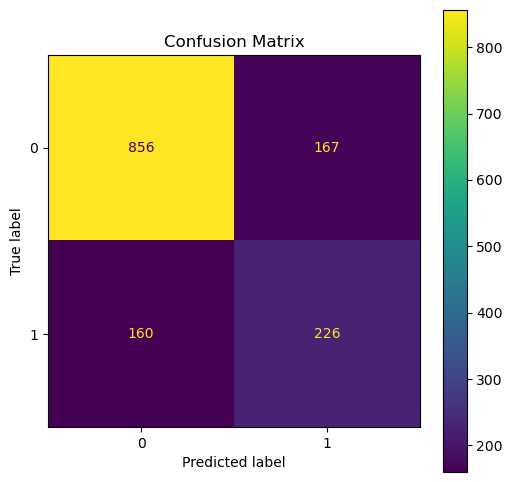

In [183]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax) 
plt.title("Confusion Matrix") 
plt.show()

### ROC curve

In [186]:
roc_auc_score(y_test , model.predict_proba(X_test)[:,1])

0.8092043618535345

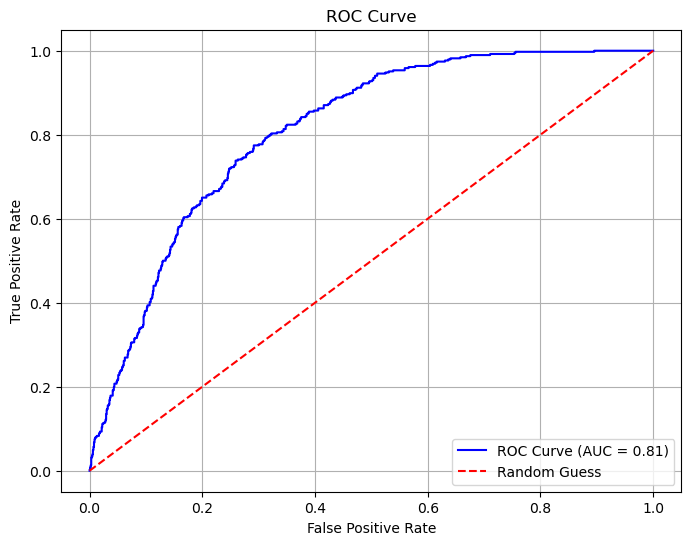

In [188]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color='red')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### F1 Score

In [191]:
f1_score(y_test , y_pred_test)

0.5802310654685494

### Log Loss

In [194]:
log_loss(y_test , y_pred_test)

8.364992660213845

<div class='alert alert-info alert-block' align='center'><h3>Hypertunning of the MultinomialNB Model</h3></div>

In [203]:
# Define the model
mnb = MultinomialNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10],
    'fit_prior': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'alpha': 0.01, 'fit_prior': True}


In [205]:
tunned_model = grid_search.best_estimator_

# fitting the model 
tunned_model.fit(X_train , y_train)

# predicting the test data
y_pred = tunned_model.predict(X_test)

# checking the accuracy for test data
accuracyScore = accuracy_score(y_test , y_pred)
print('Accuracy Score :' , accuracyScore)

Accuracy Score : 0.7679205110007097


<div class='alert alert-info alert-block' align='center'><h4>Updating the values of metrics of model in dataFrame</h4></div>

In [213]:
# funtion update score card to update the score 
score_card = pd.DataFrame(columns=['model_name' , 'Accuracy Score' , 'Precision Score' , 'Recall Score' ,'f1 Score'])

def update_score_card(score_card, y_test, y_pred, model_name, y_prob=None):
    """
    Updates the score_card DataFrame with evaluation metrics for a given model.
    """
    metrics = {
        'model_name': model_name,
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred, average='binary', zero_division=0),
        'Recall Score': recall_score(y_test, y_pred, average='binary', zero_division=0),
        'f1 Score': f1_score(y_test, y_pred, average='binary', zero_division=0)
    }
    
    if y_prob is not None:
        metrics['AUC Score'] = roc_auc_score(y_test, y_prob)
    else:
        metrics['AUC Score'] = None

    # Create a new DataFrame for the metrics
    metrics_df = pd.DataFrame([metrics])

    # Concatenate with the existing score_card
    score_card = pd.concat([score_card, metrics_df], ignore_index=True)
    return score_card


In [215]:
score_card = update_score_card(score_card , y_train , y_pred_train , 'Train Data',model.predict_proba(X_train)[:,1])

In [217]:
score_card = update_score_card(score_card , y_test , y_pred_test , 'Test Data',model.predict_proba(X_test)[:,1])

In [219]:
score_card = update_score_card(score_card , y_test , y_pred , 'Tunned model',tunned_model.predict_proba(X_test)[:,1])

In [221]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score
0,Train Data,0.777955,0.573791,0.608227,0.590507,0.823247
1,Test Data,0.767921,0.575064,0.585492,0.580231,0.809204
2,Tunned model,0.767921,0.575064,0.585492,0.580231,0.809232


### After hyperparameter tuning, there was no change in the accuracy score of the model.